In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf, numpy as np, glob, os, os.path as osp, shutil
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set()
from spinup.utils.logx import restore_tf_graph
from spinup.utils.plot import plot_data, get_all_datasets

In [2]:
# CLEAN
models = sorted(glob.glob('data/*Double*/',recursive=True))
# for model in models:
#  shutil.rmtree(model)
sorted(glob.glob('data/*Slant*/',recursive=True))

['data/dsr1_0.-SlantedRidge-ddpg/',
 'data/dsr1_1e-1-SlantedRidge-ddpg/',
 'data/dsr1_1e-2-SlantedRidge-ddpg/',
 'data/dsr1_1e-3-SlantedRidge-ddpg/']

In [3]:
def reset_graph():
  if 'sess' in globals() and sess:
    sess.close()
  tf.reset_default_graph()

In [4]:
def dh(x):
  if -1.0 <= x < 0.0:
    return x + 1
  elif 0.0 <= x < 1.0:
    return 5 - 5 * x
  else:
    return 0.0
  
def dz(x):
  if -1.0 <= x < 0.0:
    return x + 1
  elif 0.0 <= x < 1.0:
    return x - 0.5
  else:
    return 0.0
  
def sr(x):
  if -1.0 <= x <= -0.05:
    return x
  elif 0.05 <= x <= 1.0:
    return -x
  elif -0.05 < x < 0.05:
    return 3*x + 5

def plot_true(fn, ax):
  xs = np.linspace(-0.2, 0.2, num=10000).reshape([-1, 1])
  ys = [fn(x) for x in xs]
  ax.plot(xs, ys, 'r')

In [5]:
def load_model(fpath):
  reset_graph()

  saves = [int(x[11:]) for x in os.listdir(fpath) if 'simple_save' in x and len(x)>11]
  itr = '%d'%max(saves) if len(saves) > 0 else ''

  # load the things!
  sess = tf.Session(config=tf.ConfigProto(device_count={'GPU': 0}))
  model = restore_tf_graph(sess, osp.join(fpath, 'simple_save'+itr))

  if 'q' in model.keys():
    get_q = lambda a: sess.run(model['q'], feed_dict={model['x']: np.zeros_like(a), model['a']: a})
  else:
    get_q = lambda a: np.min(sess.run([model['q1'], model['q2']], 
                                   feed_dict={model['x']: np.zeros_like(a), model['a']: a}),axis=0)
    
  return sess, model, get_q

In [6]:
k = 'Slant'
models = sorted(glob.glob('data/*{}*/*{}*/'.format(k,k),recursive=True))
print(models)

['data/dsr1_0.-SlantedRidge-ddpg/dsr1_0.-SlantedRidge-ddpg_s0/', 'data/dsr1_1e-1-SlantedRidge-ddpg/dsr1_1e-1-SlantedRidge-ddpg_s0/', 'data/dsr1_1e-2-SlantedRidge-ddpg/dsr1_1e-2-SlantedRidge-ddpg_s0/', 'data/dsr1_1e-3-SlantedRidge-ddpg/dsr1_1e-3-SlantedRidge-ddpg_s0/']


INFO:tensorflow:Restoring parameters from data/dsr1_0.-SlantedRidge-ddpg/dsr1_0.-SlantedRidge-ddpg_s0/simple_save/variables/variables


/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


Plotting from...

data/dsr1_0.-SlantedRidge-ddpg/dsr1_0.-SlantedRidge-ddpg_s0/



/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


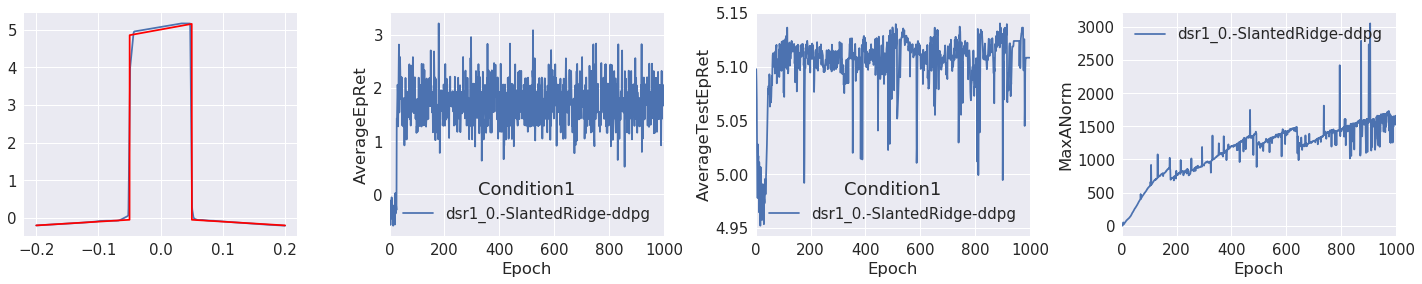

data/dsr1_0.-SlantedRidge-ddpg/dsr1_0.-SlantedRidge-ddpg_s0/
INFO:tensorflow:Restoring parameters from data/dsr1_1e-1-SlantedRidge-ddpg/dsr1_1e-1-SlantedRidge-ddpg_s0/simple_save/variables/variables


/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


Plotting from...

data/dsr1_1e-1-SlantedRidge-ddpg/dsr1_1e-1-SlantedRidge-ddpg_s0/



/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


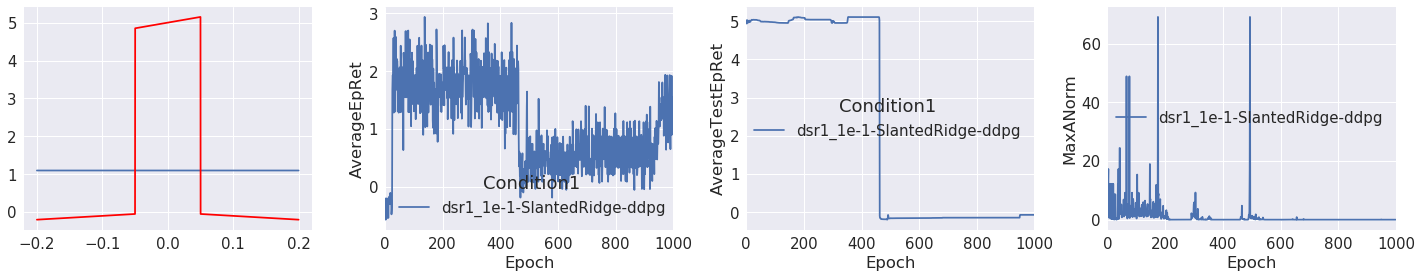

data/dsr1_1e-1-SlantedRidge-ddpg/dsr1_1e-1-SlantedRidge-ddpg_s0/
INFO:tensorflow:Restoring parameters from data/dsr1_1e-2-SlantedRidge-ddpg/dsr1_1e-2-SlantedRidge-ddpg_s0/simple_save/variables/variables


/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


Plotting from...

data/dsr1_1e-2-SlantedRidge-ddpg/dsr1_1e-2-SlantedRidge-ddpg_s0/



/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


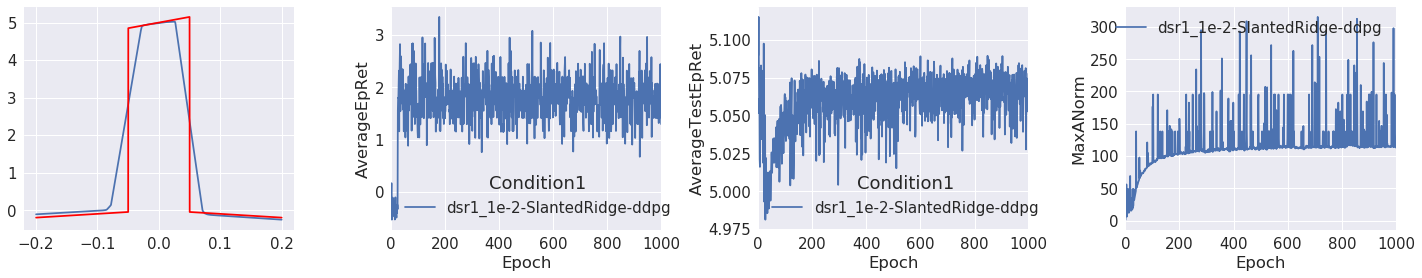

data/dsr1_1e-2-SlantedRidge-ddpg/dsr1_1e-2-SlantedRidge-ddpg_s0/
INFO:tensorflow:Restoring parameters from data/dsr1_1e-3-SlantedRidge-ddpg/dsr1_1e-3-SlantedRidge-ddpg_s0/simple_save/variables/variables


/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


Plotting from...

data/dsr1_1e-3-SlantedRidge-ddpg/dsr1_1e-3-SlantedRidge-ddpg_s0/



/h/spitis/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


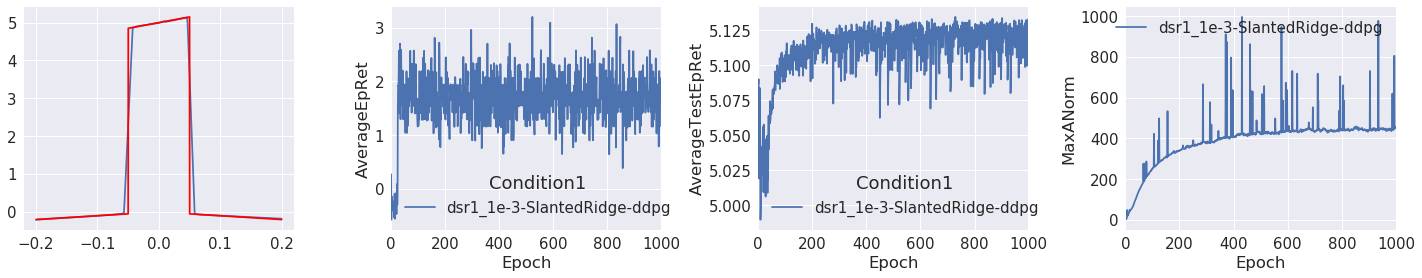

data/dsr1_1e-3-SlantedRidge-ddpg/dsr1_1e-3-SlantedRidge-ddpg_s0/


In [8]:
for model in models:
  _, _, get_q = load_model(model)
  xs = np.linspace(-0.2, 0.2, num=10000).reshape([-1, 1])
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
  data = get_all_datasets([model])
  plot_data(data, ax=ax2, value='AverageEpRet', smooth=0)
  plot_data(data, ax=ax3, value='AverageTestEpRet', smooth=0)
  plot_data(data, ax=ax4, value='MaxANorm')
  ax1.plot(xs, get_q(xs))
  if 'dh' in model:
    plot_true(dh, ax1)
  elif 'dz' in model:
    plot_true(dz, ax1)
  else:
    plot_true(sr, ax1)
  plt.show()
  print(model)